In [114]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [99]:
rate1, audio1 = wavfile.read('birdsong-clip/nightingale-clip.wav')
rate2, audio2 = wavfile.read('birdsong-clip/blackbird_clip.wav')
rate3, audio3 = wavfile.read('birdsong-clip/song_sparrow-clip.wav')

In [100]:
rate1, rate2, rate3, audio1.shape, audio2.shape, audio3.shape, 

(44100, 44100, 44100, (93696,), (133044, 2), (141303, 2))

In [104]:
mono1 = audio1
mono2 = np.mean(audio2, axis=1)
mono3 = np.mean(audio3, axis=1)

93696


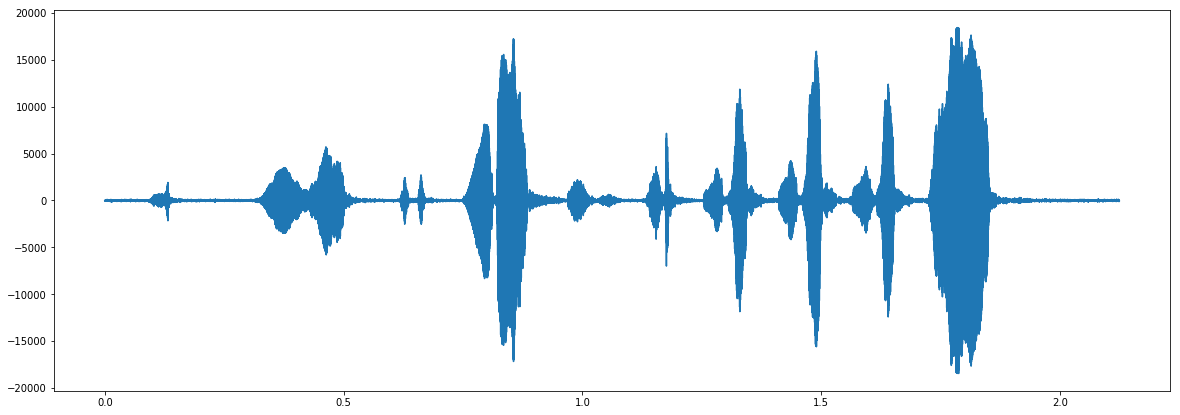

In [105]:
def display(audiofile):
    rate, audio = wavfile.read(audiofile)
    plt.figure(figsize=(20,7)) 
    N = audio.shape[0]
    print(N)
    plt.plot(np.arange(N)/rate, audio)

def display2(audiofile, a, b):
    rate, audio = wavfile.read(audiofile)
    audio = audio[a:b]
    plt.figure(figsize=(20,7)) 
    N = audio.shape[0]
    print(b-a)
    plt.plot(np.arange(N)/rate, audio)
    return audio

display('birdsong-clip/nightingale-clip.wav')

133044


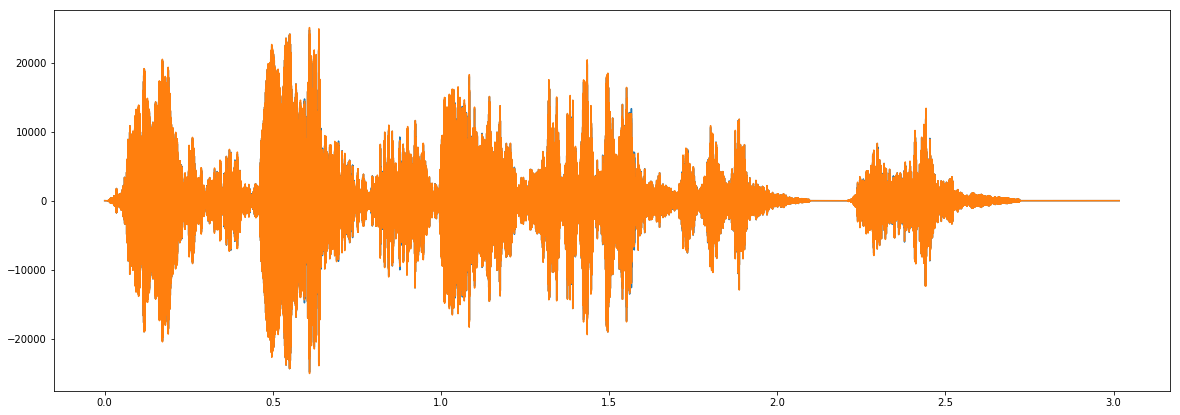

In [106]:
display('birdsong-clip/blackbird_clip.wav')

141303


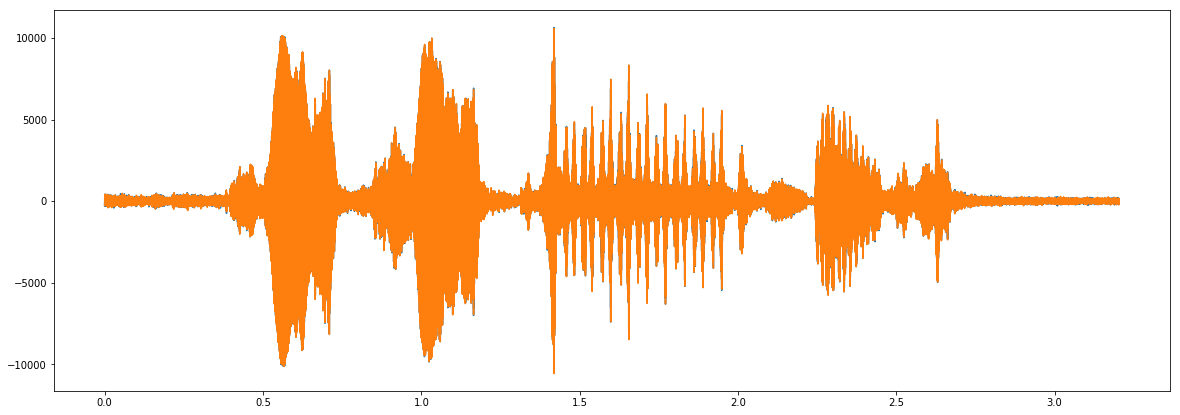

In [107]:
display('birdsong-clip/song_sparrow-clip.wav')

133044


(133044,)

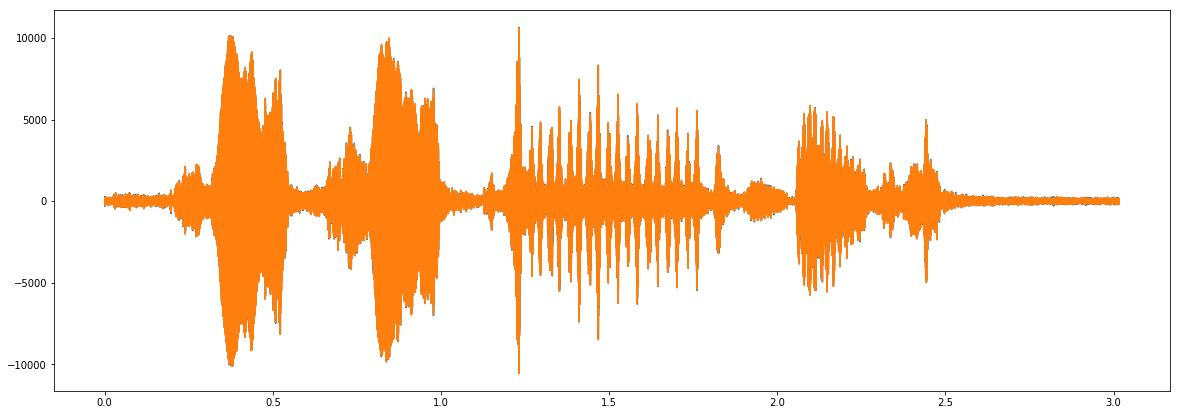

In [108]:
audio3b = display2('birdsong-clip/song_sparrow-clip.wav', 8259, 141303)
mono3 = np.mean(audio3b,axis=1)
mono3.shape

In [110]:
data = np.array([mono2, mono3])
data.shape

(2, 133044)

In [119]:
pca = PCA(2)  # project from 133044 to 2 dimensions
projected = pca.fit_transform(data)
print(data.shape)
print(projected.shape)

(2, 133044)
(2, 2)


In [127]:
print(pca.components_)

[[-1.35479673e-05  8.64763871e-06  8.93589333e-06 ... -2.94019716e-05
   3.17080086e-06 -4.29499389e-05]
 [-8.44066762e-01 -1.14325155e-06 -5.38311018e-07 ...  1.54619358e-05
   1.83147898e-06 -3.22617368e-05]]


In [121]:
print(pca.explained_variance_)

[1.50437965e+12 2.90027574e-21]


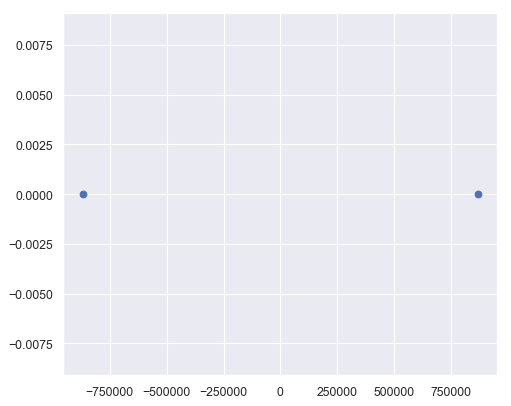

In [125]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(projected[:, 0], projected[:, 1])
